# Driving behavior

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_training = pd.read_csv("data/train_motion_data.csv")
df_test = pd.read_csv("data/test_motion_data.csv")

df_training


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


We have 7 quantitative values and 1 categorical value

Accelerometer Units: $m/s^2$

Gyroscope Units: $rad/s$

For these type of problem we want to know a category (In this case class of driver), so we want classification models.

In [4]:
df_training.isna().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [5]:
observations, variables = df_training.shape

print(f"Observations: {observations}, Variables: {variables}")

Observations: 3644, Variables: 8


## Describe the data

In [6]:
X = df_training.drop(columns="Class")
y = df_training.Class

In [7]:
X.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


Seeing the min and max values of each type of variable and the different type of units our variables use, we probably should normalize our data for our problem

In [8]:
print(y.unique())
print(y.value_counts())

normal_count, aggressive_count, slow_count = y.value_counts()

Ntotal = normal_count + aggressive_count + slow_count

print(f"Proportion of Normal is {(normal_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Aggressive is {(aggressive_count / Ntotal) * 100:0.1f}%")
print(f"Proportion of Slow is {(slow_count / Ntotal) * 100:0.1f}%")


['NORMAL' 'AGGRESSIVE' 'SLOW']
SLOW          1331
NORMAL        1200
AGGRESSIVE    1113
Name: Class, dtype: int64
Proportion of Normal is 36.5%
Proportion of Aggressive is 32.9%
Proportion of Slow is 30.5%


As we can see the data is not balanced, there is a 6% max. difference between the classes, so it may be necessary to balance our data, but these is not our only indicator to say that we should balance our data

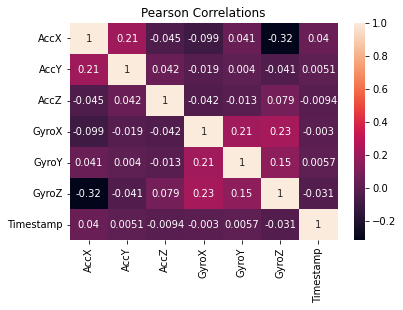

In [9]:
# Calculate correlation between variables
ax = sns.heatmap(df_training.corr(), annot=True).set(title='Pearson Correlations');

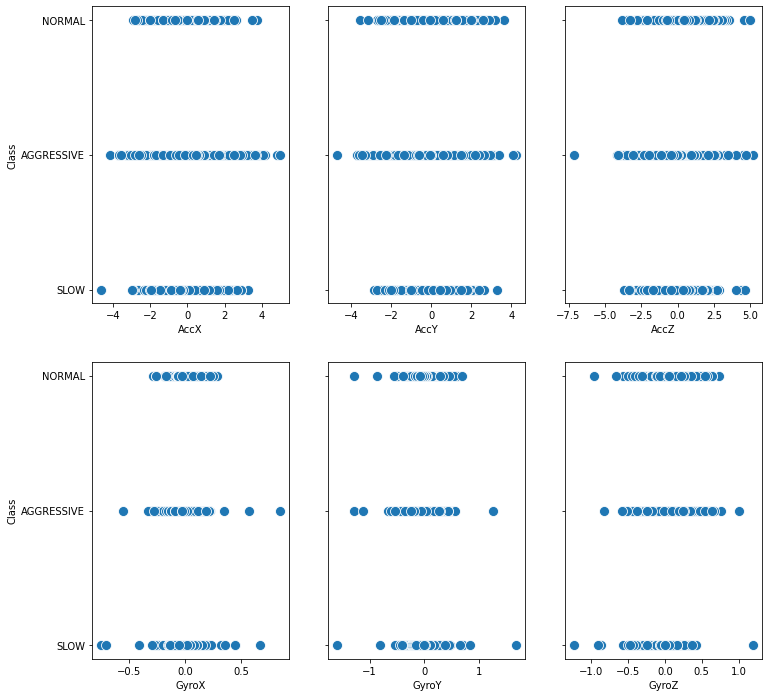

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(12, 12), sharey=True)
#fig.suptitle('Scatter plots')

sns.scatterplot(ax=axes[0,0], data=df_training, x="AccX", y="Class", s=100)

sns.scatterplot(ax=axes[0,1], data=df_training, x="AccY", y="Class", s=100)

sns.scatterplot(ax=axes[0, 2], data=df_training, x="AccZ", y="Class", s=100)

sns.scatterplot(ax=axes[1, 0], data=df_training, x="GyroX", y="Class", s=100)

sns.scatterplot(ax=axes[1, 1], data=df_training, x="GyroY", y="Class", s=100)

sns.scatterplot(ax=axes[1, 2], data=df_training, x="GyroZ", y="Class", s=100)

plt.show()

<AxesSubplot:xlabel='AccX', ylabel='AccY'>

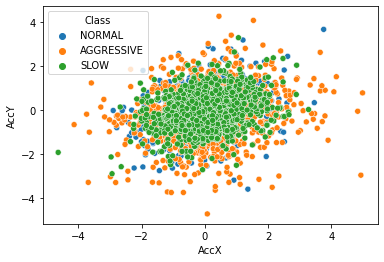

In [11]:
sns.scatterplot(data=df_training, x="AccX", y="AccY", hue="Class")

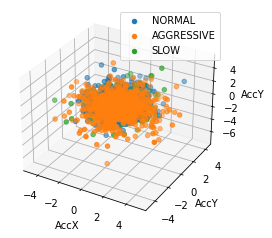

In [12]:
#%matplotlib nbagg
#%matplotlib ipympl

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df_training.Class.unique():
    ax.scatter3D(df_training.AccX[df_training.Class == s], df_training.AccY[df_training.Class == s], df_training.AccZ[df_training.Class == s],label=s)

ax.set_xlabel('AccX')
ax.set_ylabel('AccY')
ax.set_zlabel('AccY')

ax.legend()

<AxesSubplot:xlabel='GyroX', ylabel='GyroY'>

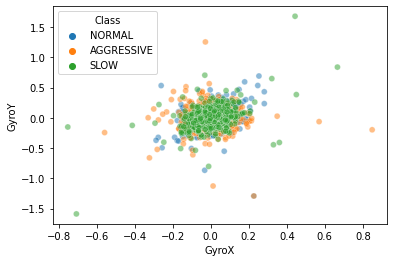

In [13]:
sns.scatterplot(data=df_training, x="GyroX", y="GyroY", hue="Class", alpha=0.5)

<AxesSubplot:xlabel='GyroX', ylabel='GyroZ'>

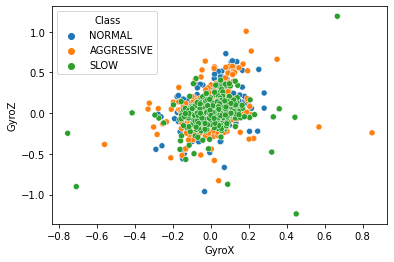

In [14]:
sns.scatterplot(data=df_training, x="GyroX", y="GyroZ", hue="Class")

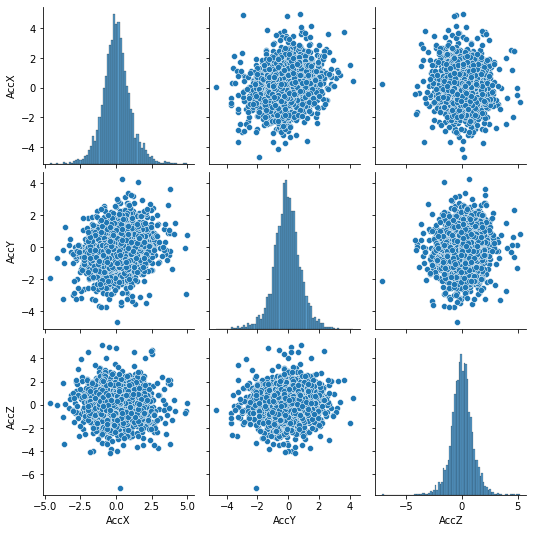

In [15]:
sns.pairplot(df_training[["AccX", "AccY", "AccZ", "Class"]])

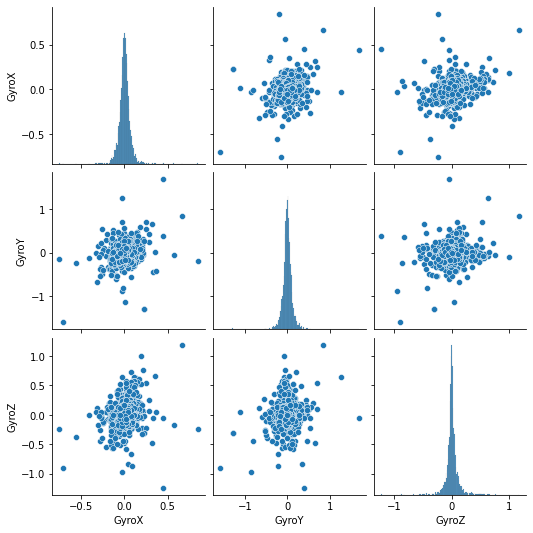

In [16]:
sns.pairplot(df_training[["GyroX", "GyroY", "GyroZ", "Class"]])

Seeing the histograms in the pairplots it could be that the data is normalized but we have to do a test to prove this

### Check the type of distribution

$H0$ : Our data is normal

Confidence level $\alpha$: $95\%$

if our p-value is bigger than $1 - \alpha = 0.05%$, the nul hypothesis is accepted, else is rejected

In [17]:
import scipy.stats

In [18]:
test_kolmogorov = scipy.stats.kstest(df_training.AccX, 'norm')
test_kolmogorov

KstestResult(statistic=0.045950008466853653, pvalue=4.000398639336288e-07)

Our p-value is less than $<0.05$ so our $H0$ is rejected

Based on these graphs we can probably know that a logistic regression model would not help us predict the type of driver too well. Our scatterplot based on the Class variable can be the one that shows us these conclusion the most, because all the data is concentrated in one part for any type of driver.

<AxesSubplot:xlabel='AccX'>

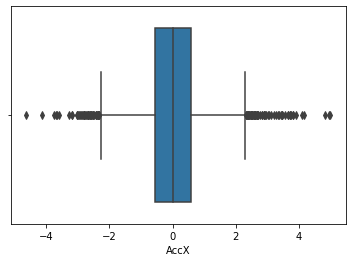

In [19]:
sns.boxplot(x=df_training.AccX)

<AxesSubplot:xlabel='AccY'>

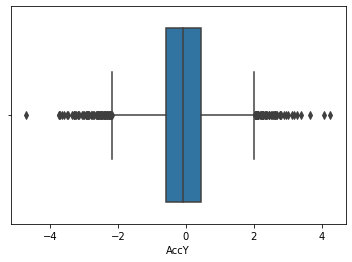

In [20]:
sns.boxplot(x=df_training.AccY)

<AxesSubplot:xlabel='GyroX'>

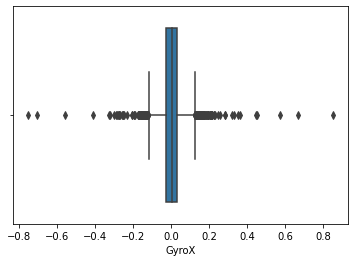

In [21]:
sns.boxplot(x=df_training.GyroX)

<AxesSubplot:xlabel='GyroY'>

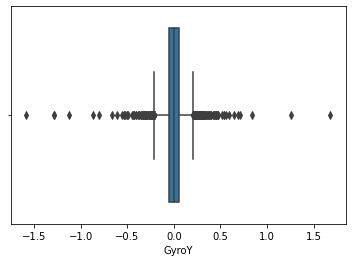

In [22]:
sns.boxplot(x=df_training.GyroY)

It seems we have a lot of atypical data, so maybe we should remove it or maybe we should check what type of distribution our data has, to know if having atypical data is something normal (like exponential distribution)

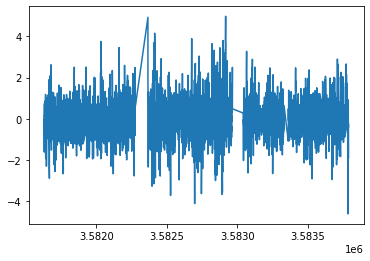

In [23]:
plt.plot(df_training.Timestamp, df_training.AccX)

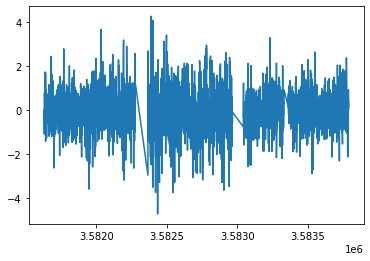

In [24]:
plt.plot(df_training.Timestamp, df_training.AccY)

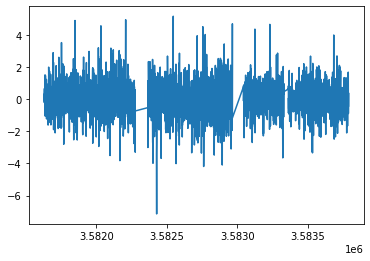

In [25]:
plt.plot(df_training.Timestamp, df_training.AccZ)

It seems our acceleration is very sporadic, but these alone doesn't tell us to much

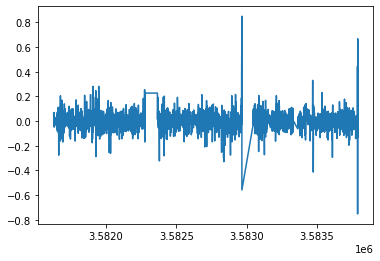

In [26]:
plt.plot(df_training.Timestamp, df_training.GyroX)

## Conclusion

At the end of the exploration of the data we can draw some conclusion:
-   We should probably normalize our data to train it
-   The timestamp variable doesn't seem to help for our problem and would probably affect training, so we should remove it
-   A random forest model would probably be possible to apply for these problem because we don't have the type data that would let us make decisions based on yes or no, because here to make a decision we have to see multiple points, we have to see a history of the driving of a person
-   Seeing our graphs, and more the scatterplot based on the class type, we can probably say that a logistic regression model would probably not give us perfect results
-   Understanding the gyroscope and Accelerometer better would give us more information to know which variables are the ones we need

### What data to remove

Based on our heatmap and by logic we can remove the Timestamp variable, because it doesn't correlate with the data and by logic we know that it doesn't explain if a person drives aggressively or not, What helps us know if a person is driving aggressively is multiple points weher acceleration and movements is happening, but the time when it happened would not work in these case to know if the driver is aggressive. For other types of problems it may provide useful information like at what time of day driving is more aggressive, but for this case it just adds noise and also it could add overfitting to the training of the data.

In [27]:
df_training.drop(columns="Timestamp", inplace=True)
df_test.drop(columns="Timestamp", inplace=True)
print(df_training)
print(df_test)

          AccX      AccY      AccZ     GyroX     GyroY     GyroZ   Class
0     0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938  NORMAL
1    -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536  NORMAL
2    -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888  NORMAL
3     0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902  NORMAL
4     0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902  NORMAL
...        ...       ...       ...       ...       ...       ...     ...
3639  0.915688 -2.017489  1.687505  0.450360  0.384845 -1.236468    SLOW
3640 -1.934203  0.914925 -0.096013  0.321468  0.649350 -0.477162    SLOW
3641 -0.222845  0.747304 -0.887430  0.361174 -0.406836  0.054291    SLOW
3642 -0.349423  0.067261  0.394368 -0.132405  0.020159 -0.004963    SLOW
3643 -0.402428  0.406218 -0.423009 -0.053603 -0.006720  0.001145    SLOW

[3644 rows x 7 columns]
          AccX      AccY      AccZ     GyroX     GyroY     GyroZ       Class
0     0.758194 -0.2177

#### Change our classes from strings to number

We should change our class data from strings to numbers to be able to train it

In [28]:
df_training.Class = [0 if i == "AGGRESSIVE" else 1 if i == "NORMAL" else 2 for i in df_training.Class]
df_test.Class =  [0 if i == "AGGRESSIVE" else 1 if i == "NORMAL" else 2 for i in df_test.Class]

print(df_training)
print(df_test)

          AccX      AccY      AccZ     GyroX     GyroY     GyroZ  Class
0     0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938      1
1    -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536      1
2    -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888      1
3     0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902      1
4     0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902      1
...        ...       ...       ...       ...       ...       ...    ...
3639  0.915688 -2.017489  1.687505  0.450360  0.384845 -1.236468      2
3640 -1.934203  0.914925 -0.096013  0.321468  0.649350 -0.477162      2
3641 -0.222845  0.747304 -0.887430  0.361174 -0.406836  0.054291      2
3642 -0.349423  0.067261  0.394368 -0.132405  0.020159 -0.004963      2
3643 -0.402428  0.406218 -0.423009 -0.053603 -0.006720  0.001145      2

[3644 rows x 7 columns]
          AccX      AccY      AccZ     GyroX     GyroY     GyroZ  Class
0     0.758194 -0.217791  0.457263  0.0

## Create the model

In [29]:
from sklearn.linear_model import LogisticRegression

X_training  = df_training.drop(columns=["Class", "AccZ", "GyroX", "GyroY", "GyroZ"]).values
y_training  = df_training.Class.values
X_test = df_test.drop(columns=["Class", "AccZ", "GyroX", "GyroY", "GyroZ"]).values
y_test = df_test.Class.values

### Normalize the data

In [30]:
df_training.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,1.059824
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,0.816882
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,0.000000
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,0.000000
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,1.000000
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,2.000000
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,2.000000


Viendo la diferencia de los min y max de los valores de Acc. y Gyro. y sabiendo que son medidos en diferentes escalas seria buena idea hacer una normalizacion de los datos.

In [31]:
X_training = ((X_training - np.min(X_training)) / (np.max(X_training) - np.min(X_training))) * 1000
X_test = ((X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test))) * 1000

print(X_training)
print(X_test)

[[485.24820913 485.24820913]
 [317.4829632  373.48223104]
 [423.85028875 472.60953761]
 ...
 [462.23977186 562.40639787]
 [449.17068655 492.19279974]
 [443.69802217 527.18973486]]
[[621.34746061 548.98120104]
 [614.62723064 562.26685996]
 [767.13927629   2.79036434]
 ...
 [660.05381259 436.47204445]
 [632.77489418 608.38065057]
 [673.54526338 579.2388793 ]]


### Create the model

In [32]:
clfmodel = LogisticRegression(C=1e5)
clfmodel.fit(X_training , y_training)

LogisticRegression(C=100000.0)

#### Check for overfitting 

In [33]:
print(f"{clfmodel.score(X_test, y_test) * 100}%")
print(f"{clfmodel.score(X_training, y_training) * 100}%")

44.066147859922175%
39.92864983534577%


**No normalization, no balancing**

test_score: 45.071%
training_score: 40.15%

**With normalization, no balancing**

test_score: 45.071%
training_score: 40.26%

In [34]:
y_pred = clfmodel.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
CM

array([[  93,   13,  708],
       [  29,    3,  965],
       [   7,    3, 1263]])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 150)}

knn_gscv = GridSearchCV(neigh, param_grid, cv=20)
knn_gscv.fit(X_training, y_training)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149])})

In [37]:
knn_gscv.best_params_

{'n_neighbors': 115}

In [38]:
knn_gscv.best_score_

0.4154461658560019

In [39]:
knn_gscv.score(X_test, y_test)

0.428988326848249

In [59]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

param_grid = {'n_estimators': np.arange(1, 40), 'random_state': [0], 'max_depth': np.arange(1, 20)}

random_gscv = GridSearchCV(random_forest, param_grid, cv=10)
random_gscv.fit(X_training, y_training)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'random_state': [0]})

In [62]:
random_gscv.best_params_

{'max_depth': 7, 'n_estimators': 15, 'random_state': 0}

In [60]:
random_gscv.score(X_training, y_training)

0.5134467618002195

In [61]:
random_gscv.score(X_test, y_test)

0.4160181582360571